<a href="https://colab.research.google.com/github/asujin/Text-mining-project/blob/main/8_25original_v7loss_E%2CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

가정들을 좀 더 추가한 경우 E의 경우에는 10일전의 데이터도 필요

In [1]:
!pip install xmltodict

In [2]:
import requests
import xmltodict
import time
import pandas as pd
import urllib.parse as up
import urllib as ul
import numpy as np
import math
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.graph_objs.scatter.marker import Line
from plotly.subplots import make_subplots
import pandas as pd
import json
import plotly.graph_objects as go
import itertools
import decimal

In [3]:
%precision 15

'%.15f'

# COVID 백신

In [4]:
# To import vaccine data

url_base = "https://api.odcloud.kr/api/15077756/v1/vaccine-stat"
url_serviceKey = 'ntjoxkSQoZ%2BmIHTV9H%2FajwmAKelzxFovhQWHJ6iftTjjhgkLbODfdUQcSssSUFxraKuWlnvcVXBHpJzuZ2Sm0A%3D%3D'
url_pages = "10000" #페이지당열갯수
url_base_date=''
url = url_base + "?page=1&perPage=" + url_pages + "&base_Date="+ url_base_date + "&serviceKey=" + url_serviceKey 
#https://api.odcloud.kr/api/15077756/v1/vaccine-stat?page=1&perPage=10&cond%5BbaseDate%3A%3AEQ%5D=2021-02-26&serviceKey=%7BntjoxkSQoZ%252BmIHTV9H%252FajwmAKelzxFovhQWHJ6iftTjjhgkLbODfdUQcSssSUFxraKuWlnvcVXBHpJzuZ2Sm0A%253D%253D%7D

In [5]:
req = requests.get(url).content

In [6]:
#req

In [7]:
info = json.loads(req)
info
info=pd.DataFrame(info['data'])

In [8]:
##시간을 제외하고 날짜만 뽑아내기
info['baseDate']=pd.to_datetime(info['baseDate']).dt.date

In [9]:
# 'sido'에서 전국데이터만 필요하기 때문에 인덱스 뽑아내기
is_sido= info['sido']=='전국' 

In [10]:
info=info[is_sido]

In [11]:
info

,accumulatedFirstCnt,accumulatedSecondCnt,baseDate,firstCnt,secondCnt,sido,totalFirstCnt,totalSecondCnt
0,449535,0,2021-03-11,51100,0,전국,500635,0
18,503750,0,2021-03-12,42527,0,전국,546277,0
36,547974,0,2021-03-13,35684,0,전국,583658,0
54,584397,0,2021-03-14,3487,0,전국,587884,0
72,587884,0,2021-03-15,1074,0,전국,588958,0
...,...,...,...,...,...,...,...,...
3048,27081089,13360105,2021-08-27,646550,420821,전국,27727639,13780926
3066,27746442,13797724,2021-08-28,598603,549112,전국,28345045,14346836
3084,28349072,14347973,2021-08-29,273234,254978,전국,28622306,14602951
3102,28624959,14603229,2021-08-30,16120,15842,전국,28641079,14619071


baseDate	string
통계 기준일자

sido	string
지역명칭

firstCnt	integer
당일 통계(1차 접종)

secondCnt	integer
당일 통계(2차 접종)

totalFirstCnt	integer
전체 누적 통계(1차 접종)

totalSecondCnt	integer
전체 누적 통계(2차 접종)

accumulatedFirstCnt	integer
전일까지의 누적 통계 (1차 접종)

accumulatedSecondCnt	integer
전일까지의 누적 통계 (2차 접종)

In [12]:
# 2/26일을 시작으로(1일로 쳤을 때) 49일은 4/15일이다. 따라서 4/14일은 48일째이고,
# 4/15일은 49일째로, 이때부터 R_V로 가는 집단이 생겨난다. 
# 4/14까지의 accumulated만을 고려

In [13]:
info=info[['totalFirstCnt','baseDate']]

In [14]:
info = info.sort_values(by='baseDate') #diff()를 사용하기 위해서 날짜로 오름차순 정렬

In [15]:
## index 차례로 정렬
info.reset_index(inplace=True) 

In [16]:
# 기존의 index열 삭제
info.drop(['index'], axis='columns', inplace=True)

In [17]:
info=info[1:]

In [18]:
daily_V=info['totalFirstCnt'].diff()

In [19]:
daily_V=daily_V[1:] #To remove NAN
daily_V

2       37381.0
3        4226.0
4        1074.0
5       13192.0
6       19584.0
         ...   
169    651003.0
170    617406.0
171    277261.0
172     18773.0
173    390063.0
Name: totalFirstCnt, Length: 172, dtype: float64

In [20]:
daily_V=daily_V.values.tolist() # 변환을 위해 리스트로 바꾸기 / To make t-1 at daily_V


In [21]:
daily_V.append(0)

In [22]:
info ['daily_V']=daily_V 

In [23]:
#info=info[:-6]

In [24]:
info.describe()

,totalFirstCnt,daily_V
count,1.730000e+02,173.000000
mean,1.026108e+07,164652.398844
std,8.618712e+06,217252.731377
min,5.462770e+05,0.000000
25%,2.195492e+06,14971.000000
50%,7.595072e+06,49798.000000
75%,1.605503e+07,244090.000000
max,2.903114e+07,857012.000000


In [25]:
info.to_excel('info.xls')

In [26]:
# 3월 14일의 daily_V는 37381이다. 3월 14일의 누적은 583659이다.

# COVID 감염현황 Dataset

In [27]:
url_base = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson"
url_serviceKey = 'ntjoxkSQoZ%2BmIHTV9H%2FajwmAKelzxFovhQWHJ6iftTjjhgkLbODfdUQcSssSUFxraKuWlnvcVXBHpJzuZ2Sm0A%3D%3D'
url_pages = "1000" #페이지당열갯수
url_start_date = "20210311" #시작날짜
url_end_date = "20210830" #끝날짜
url = url_base + "?serviceKey=" + url_serviceKey+ "&pageNo=1&numOfRows=" + url_pages + "&startCreateDt="+ url_start_date + "&endCreateDt=" + url_end_date

In [28]:
req = requests.get(url).content

In [29]:
xmlObject = xmltodict.parse(req)
dict_data = xmlObject['response']['body']['items']['item']

In [30]:
df = pd.DataFrame(dict_data)
df = df.astype({'decideCnt' : 'int', 'examCnt' : 'int', 'deathCnt' : 'int','clearCnt':'int', 'careCnt':'int','stateDt': 'object'})

In [31]:
df = df.drop_duplicates(['stateDt']) #중복제거

In [32]:
df

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt
0,2.0357530301,13049682,12282875,27407,220358,2021-08-30 09:40:07.28,2284,250049,766807,12032826,619,20210830,00:00,2021-08-31 10:42:19.61
1,2.0285186242,13015920,12253326,27556,218726,2021-08-29 09:30:47.611,2279,248561,762594,12004765,618,20210829,00:00,2021-08-31 10:42:09.632
2,2.0174815833,12983487,12240310,27681,216989,2021-08-28 09:51:58.552,2276,246946,743177,11993364,617,20210828,00:00,2021-08-31 10:42:00.233
3,2.0079183829,12927790,12209311,28215,214673,2021-08-27 09:47:12.926,2265,245153,718479,11964158,616,20210827,00:00,2021-08-31 10:41:51.557
4,2.0015710500,12866800,12156201,28187,212871,2021-08-26 09:37:19.288,2257,243315,710599,11912886,615,20210826,00:00,2021-08-31 10:41:43.228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1.3689055428,7084930,7013340,6577,87754,2021-03-15 09:51:09.37,1675,96006,71590,6917334,449,20210315,00:00,2021-08-25 15:25:51.526
169,1.3667734287,7066394,6996551,6550,87408,2021-03-14 09:42:57.64,1669,95627,69843,6900924,448,20210314,00:00,2021-08-25 15:25:39.318
170,1.3636531024,7046775,6978901,6876,86625,2021-03-13 09:36:41.886,1667,95168,67874,6883733,447,20210313,00:00,2021-08-25 15:25:24.143
171,1.3634663653,7012657,6943919,7273,85743,2021-03-12 09:49:58.077,1662,94678,68738,6849241,446,20210312,00:00,2021-08-25 15:25:08.407


In [33]:
df['baseDate']=df['stateDt']
df['baseDate'] = pd.to_datetime(df['baseDate']) #시계열지정

In [34]:
df=df[['baseDate','careCnt','clearCnt','deathCnt','decideCnt']]
df = df.sort_values(by='baseDate') #diff()를 사용하기 위해서 날짜로 오름차순 정렬
df.reset_index(inplace=True)
df.drop(['index'], axis='columns', inplace=True)

In [35]:
df

,baseDate,careCnt,clearCnt,deathCnt,decideCnt
0,2021-03-11,7863,84675,1652,94190
1,2021-03-12,7273,85743,1662,94678
2,2021-03-13,6876,86625,1667,95168
3,2021-03-14,6550,87408,1669,95627
4,2021-03-15,6577,87754,1675,96006
...,...,...,...,...,...
168,2021-08-26,28187,212871,2257,243315
169,2021-08-27,28215,214673,2265,245153
170,2021-08-28,27681,216989,2276,246946
171,2021-08-29,27556,218726,2279,248561


In [36]:
df['baseDate']=pd.to_datetime(df['baseDate']).dt.date

In [37]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 1 to 173
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   totalFirstCnt  173 non-null    int64  
 1   baseDate       173 non-null    object 
 2   daily_V        173 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   baseDate   173 non-null    object
 1   careCnt    173 non-null    int64 
 2   clearCnt   173 non-null    int64 
 3   deathCnt   173 non-null    int64 
 4   decideCnt  173 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.9+ KB


df의 baseDate와 info의 baseDate의 Dtype이 다르다.

In [39]:
##'baseDate를 기준으로 데이터 프레임을 합쳐준다

summary=pd.merge(df, info, on="baseDate", how="outer")
#summary=summary[:-4]

In [40]:
summary.describe()

,careCnt,clearCnt,deathCnt,decideCnt,totalFirstCnt,daily_V
count,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000
mean,12029.115607,137362.843931,1945.531792,151337.491329,1.026108e+07,164652.398844
std,7348.633096,35668.025674,159.078799,42435.822836,8.618712e+06,217252.731377
min,6066.000000,84675.000000,1652.000000,94190.000000,5.462770e+05,0.000000
25%,7273.000000,107071.000000,1811.000000,117457.000000,2.195492e+06,14971.000000
50%,8165.000000,133766.000000,1971.000000,143593.000000,7.595072e+06,49798.000000
75%,16931.000000,158955.000000,2057.000000,177943.000000,1.605503e+07,244090.000000
max,28215.000000,220358.000000,2284.000000,250049.000000,2.903114e+07,857012.000000


In [41]:
summary.to_excel('s1.xls')

In [42]:
#summary['decideCnt'].iloc[45]=138893
#summary['clearCnt'].iloc[45]=128759

##API불안정 작업으로 인한 데이터 오류 발견

In [43]:
# summary['decideCnt'].iloc[78]=138893
# summary['clearCnt'].iloc[78]=128759

In [44]:
summary['daily_X']=summary['decideCnt'].diff()

In [45]:
summary.to_excel('ss1.xls')

##By data driven

careCnt: 누적치료중 (H)

clearCnt: 누적회복환자 (HR)

DeathCnt: 누적사망자 (HD)

DecideCnt: careCnt+ clearCnt+ DeathCnt => 누적 확진환자

daily (HR) : clarCnt(t)- clearCnt( t-1)

daily (HD): deathCnt(t) - deathCnt( t-1)

4/14일의 accumulatedFirstCnt를 보고

4/15일의 V(t)= 4월 14일의 accFirst + 4/15일의 firstCnt - xi * 4/14일의 accFirst

firstCnt: daily_vbar를 나타냄

3월 12일부터 한 이유는 3월 11일에 nan이 있기 때문


#parameter

In [46]:
#latent period=epsilon 
epsilon=0.5

#time to build immunity
xi=1/49

#recovery rate=gamma
recov=1/9

#Total population 
N= 51821669

#set I0
go_x=9/10

In [47]:
summary[:-2]

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,totalFirstCnt,daily_V,daily_X
0,2021-03-11,7863.0,84675.0,1652.0,94190.0,NaN,NaN,NaN
1,2021-03-12,7273.0,85743.0,1662.0,94678.0,546277.0,37381.0,488.0
2,2021-03-13,6876.0,86625.0,1667.0,95168.0,583658.0,4226.0,490.0
3,2021-03-14,6550.0,87408.0,1669.0,95627.0,587884.0,1074.0,459.0
4,2021-03-15,6577.0,87754.0,1675.0,96006.0,588958.0,13192.0,379.0
...,...,...,...,...,...,...,...,...
167,2021-08-25,28019.0,211177.0,2237.0,241433.0,26701704.0,374932.0,2154.0
168,2021-08-26,28187.0,212871.0,2257.0,243315.0,27076636.0,651003.0,1882.0
169,2021-08-27,28215.0,214673.0,2265.0,245153.0,27727639.0,617406.0,1838.0
170,2021-08-28,27681.0,216989.0,2276.0,246946.0,28345045.0,277261.0,1793.0


In [48]:
summary=summary[1:]
## index 차례로 정렬
summary.reset_index(inplace=True) 
summary.drop(['index'], axis='columns', inplace=True)

# I구하기

In [49]:
# to make I
# i는 데이터 0~9 / 1~10 잘라주는 역할 -> 번째
# x는 go_x
# r은 recov
# n은 10
def cal_E( i, x, r, n, dat):
  dat = dat.values.tolist()
  dat = dat[i-(n+1):i] #   n+1개의 데이터 출력
  print(dat)
  s=0

  cal=[ (1 / x) * dat[n] ] #x(t-1)은 dat[0]으로 잡는다/ i=10부터 들어간다.
  #print(cal)
  while s < n:
    s = s + 1
    latcal= ((1 / x) - 1) * dat[n-s] *(( 1- r) ** (s ))
    #print(dat[n-s])
    #print((( 1- r) ** (s )))
    cal.append(latcal)
    result=sum(cal)
    #print(result)
  return result 

#i  > n 
# I(t-1)은 x(t-n) 부터 x(t-1)까지의 데이터( n개의 데이터) 가 모여야 산출 가능
# 즉 I(t-1)까지는 구할 수 있지만 I(t) 부터는 0

In [50]:
daily_X=summary['daily_X'].values.tolist()

In [51]:
#print(cal_E(20, go_x, recov, 19, summary['daily_X']))
#print(cal_E(10, go_x, recov, 9, summary['daily_X']))

In [52]:
#print(cal_E(20, go_x, recov, 19, summary['daily_X']))

In [53]:
I=[]
for i in range(9):
  I.append(0)
for i in range(10, len(summary)+1):
  I.append(cal_E(i, 9/10, recov, 9, summary['daily_X']))

#I.append(0) # I(t)의 값은 모르므로 0으로


[488.0, 490.0, 459.0, 379.0, 363.0, 469.0, 445.0, 463.0, 447.0, 456.0]
[490.0, 459.0, 379.0, 363.0, 469.0, 445.0, 463.0, 447.0, 456.0, 415.0]
[459.0, 379.0, 363.0, 469.0, 445.0, 463.0, 447.0, 456.0, 415.0, 346.0]
[379.0, 363.0, 469.0, 445.0, 463.0, 447.0, 456.0, 415.0, 346.0, 428.0]
[363.0, 469.0, 445.0, 463.0, 447.0, 456.0, 415.0, 346.0, 428.0, 430.0]
[469.0, 445.0, 463.0, 447.0, 456.0, 415.0, 346.0, 428.0, 430.0, 489.0]
[445.0, 463.0, 447.0, 456.0, 415.0, 346.0, 428.0, 430.0, 489.0, 505.0]
[463.0, 447.0, 456.0, 415.0, 346.0, 428.0, 430.0, 489.0, 505.0, 482.0]
[447.0, 456.0, 415.0, 346.0, 428.0, 430.0, 489.0, 505.0, 482.0, 382.0]
[456.0, 415.0, 346.0, 428.0, 430.0, 489.0, 505.0, 482.0, 382.0, 447.0]
[415.0, 346.0, 428.0, 430.0, 489.0, 505.0, 482.0, 382.0, 447.0, 506.0]
[346.0, 428.0, 430.0, 489.0, 505.0, 482.0, 382.0, 447.0, 506.0, 551.0]
[428.0, 430.0, 489.0, 505.0, 482.0, 382.0, 447.0, 506.0, 551.0, 557.0]
[430.0, 489.0, 505.0, 482.0, 382.0, 447.0, 506.0, 551.0, 557.0, 543.0]
[489.0

In [54]:
I

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 764.241401950679574,
 718.405943949845209,
 637.372659916290559,
 718.848221950617926,
 723.341576182530389,
 791.660906428954945,
 814.095612020033172,
 795.080984494745167,
 686.896534399174357,
 752.391149687835423,
 818.078417130098956,
 875.425520640328273,
 895.428310892572426,
 889.513948438132957,
 896.632749334707228,
 823.164036497018969,
 823.977720823238201,
 1034.154635935002489,
 1090.177962119430958,
 1077.085752105841038,
 1095.873918459118386,
 1035.701446701522173,
 1008.009507707442594,
 957.873478164616927,
 1163.308118570993656,
 1143.645157858442644,
 1127.585661159438132,
 1112.330806960037535,
 1125.453794702232472,
 972.110943615524207,
 978.045334106678524,
 1172.587082021306742,
 1189.103585277282036,
 1270.657985576436204,
 1268.239472297100065,
 1121.218818590211868,
 955.611421260915677,
 952.251422769858891,
 1222.819946342303410,
 1139.636913353852151,
 1125.114763529653601,
 1084.201052699960201,
 1054.58533367460745

In [55]:
I[34]

1143.645157858442644

In [56]:
summary['I']=(I)

# 감염재생산지수 구하기

In [57]:
## 감염재생산지수를 추정하기 위해서 감마분포를 사용한다.
## cori method 는 평균 4.8, 표준편차 2.3.
from scipy.stats import gamma
import seaborn as sns
import matplotlib.pyplot as plt
a=(4.8/2.3)*(4.8/2.3)
b=4.8/a
dat=gamma.rvs(a=a ,scale=b)
gamma.stats(dat, moments='mvsk')

(array(3.083412720684234),
 array(3.083412720684234),
 array(1.13897493226182),
 array(1.945895844481226))

In [58]:
## t is the location of data frame 'new'
## new is 'daily_decideCnt' 

def bin(t,new):
  result=[]
  #print(last)
  s=1
  while s <= t:
    ans=gamma.pdf(s,a=a,scale=b)*new[t-s]
    s=s+1
    result.append(ans)
    #print(result)
  med=sum(result)
  ans=new[t]/med

  return ans

In [59]:
new=summary['daily_X']
Rt=[]
for i in range(0,len(new)):
  Rt.append(bin(i,new))
len(Rt)
#print(Rt_date)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in double_scalars



173

In [60]:
new

0       488.0
1       490.0
2       459.0
3       379.0
4       363.0
        ...  
168    1838.0
169    1793.0
170    1615.0
171    1488.0
172       NaN
Name: daily_X, Length: 173, dtype: float64

In [61]:
summary['Rt']=Rt

#E

In [62]:
## gamma 분포의 weight 조정
med=[gamma.pdf(0,a=a,scale=b),gamma.pdf(1,a=a,scale=b) , gamma.pdf(2,a=a,scale=b),gamma.pdf(3,a=a,scale=b) ,
     gamma.pdf(4,a=a,scale=b) , gamma.pdf(5,a=a,scale=b),gamma.pdf(6,a=a,scale=b),
     gamma.pdf(7,a=a,scale=b) , gamma.pdf(8,a=a,scale=b), gamma.pdf(9,a=a,scale=b),
     gamma.pdf(10,a=a,scale=b)]

sum_med=sum(med)

W_0=med[0]/sum_med
W_1=med[1]/sum_med
W_2=med[2]/sum_med
W_3=med[3]/sum_med
W_4=med[4]/sum_med
W_5=med[5]/sum_med
W_6=med[6]/sum_med
W_7=med[7]/sum_med
W_8=med[8]/sum_med
W_9=med[9]/sum_med
W_10=med[10]/sum_med

Weights=[W_0,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10]


In [63]:
Weights

[0.000000000000000,
 0.028284504495516,
 0.116829909406385,
 0.183798357870708,
 0.194756821574028,
 0.166186790343309,
 0.123655500199049,
 0.083710326251938,
 0.052880756961305,
 0.031685996665620,
 0.018211036232141]

In [64]:
## t is the location of data frame 'new'
## new is 'daily_decideCnt' 
def W_bin(t,new):
  result=[]
  #print(last)
  s=1
  while s <= 10:
    ans=Weights[s]*new[t+s-1]
    ##print(s)
    print(new[t+s-1]) 
    s=s+1
    result.append(ans)
    #print(result)
  med=sum(result)
  #ans=new[t]/med

  return med

In [65]:
# 10개가 쌓이기전까지는 구할수없으므로, 10번째이후부터 구할수있다.
E=[]
new2=summary['I']
for i in range(0,len(new2)-10):
  E.append(W_bin(i,new2))

for i in range(10):
  E.append(0)
#print(E)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
764.2414019506796
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
764.2414019506796
718.4059439498452
0.0
0.0
0.0
0.0
0.0
0.0
0.0
764.2414019506796
718.4059439498452
637.3726599162906
0.0
0.0
0.0
0.0
0.0
0.0
764.2414019506796
718.4059439498452
637.3726599162906
718.8482219506179
0.0
0.0
0.0
0.0
0.0
764.2414019506796
718.4059439498452
637.3726599162906
718.8482219506179
723.3415761825304
0.0
0.0
0.0
0.0
764.2414019506796
718.4059439498452
637.3726599162906
718.8482219506179
723.3415761825304
791.660906428955
0.0
0.0
0.0
764.2414019506796
718.4059439498452
637.3726599162906
718.8482219506179
723.3415761825304
791.660906428955
814.0956120200332
0.0
0.0
764.2414019506796
718.4059439498452
637.3726599162906
718.8482219506179
723.3415761825304
791.660906428955
814.0956120200332
795.0809844947452
0.0
764.2414019506796
718.4059439498452
637.3726599162906
718.8482219506179
723.3415761825304
791.660906428955
814.0956120200332
795.0809844947452
686.8965343991744
764.2414019506

In [66]:
new2.to_excel('a.xls')

In [67]:
print(new2)

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
          ...     
168    3098.732472
169    3051.147214
170    2839.164178
171    2671.335980
172            NaN
Name: I, Length: 173, dtype: float64


In [68]:
summary['I']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
          ...     
168    3098.732472
169    3051.147214
170    2839.164178
171    2671.335980
172            NaN
Name: I, Length: 173, dtype: float64

In [69]:
summary['I'][0]

0.000000000000000

In [70]:
summary['E']=(E)

In [71]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,totalFirstCnt,daily_V,daily_X,I,Rt,E
0,2021-03-12,7273.0,85743.0,1662.0,94678.0,546277.0,37381.0,488.0,0.000000,inf,13.917628
1,2021-03-13,6876.0,86625.0,1667.0,95168.0,583658.0,4226.0,490.0,0.000000,36.246291,37.298667
2,2021-03-14,6550.0,87408.0,1669.0,95627.0,587884.0,1074.0,459.0,0.000000,6.612587,74.784289
3,2021-03-15,6577.0,87754.0,1675.0,96006.0,588958.0,13192.0,379.0,0.000000,2.419717,135.251506
4,2021-03-16,6436.0,88255.0,1678.0,96369.0,602150.0,19584.0,363.0,0.000000,1.485812,224.295620
...,...,...,...,...,...,...,...,...,...,...,...
168,2021-08-27,28215.0,214673.0,2265.0,245153.0,27727639.0,617406.0,1838.0,3098.732472,1.063345,0.000000
169,2021-08-28,27681.0,216989.0,2276.0,246946.0,28345045.0,277261.0,1793.0,3051.147214,1.018264,0.000000
170,2021-08-29,27556.0,218726.0,2279.0,248561.0,28622306.0,18773.0,1615.0,2839.164178,0.900114,0.000000
171,2021-08-30,27407.0,220358.0,2284.0,250049.0,28641079.0,390063.0,1488.0,2671.335980,0.823016,0.000000


# 백신데이터 정리

2/26일을 시작으로(0일로 쳤을 때) 49일은 4/16일이다. 따라서 4/15일은 48일째이고,
4/16일은 49일째로, 이때부터 R_V로 가는 집단이 생겨난다. 
 4/15까지의 accumulated만을 고려

In [72]:
## # 2/26일을 시작으로(0일로 쳤을 때) 48일은 4/15일이다. 따라서 4/16일은 49일째이고,

# 2/26일을 시작으로(1일로 쳤을 때) 49일은 4/16일이다. 따라서 4/15일은 48일째이고,
# 4/16일은 49일째로, 이때부터 R_V로 가는 집단이 생겨난다. 
# 4/14까지의 accumulated만을 고려

In [73]:
## 4월 14일의 데이터부터니까 4월 13일의 total First를 써야한다.
summary=summary[34:]

In [74]:
summary.reset_index(inplace=True) 
summary.drop(['index'], axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
summary ## daily_v의 마지막값은 전날 백신맞은 집단까지 카운트 한 뒤에 그 뒤로 새로 백시 맞은 사람의 수
        ## 4월 15일의 누적백신 1379653
        ## 4월 16일부터 빠짐
        

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,totalFirstCnt,daily_V,daily_X,I,Rt,E
0,2021-04-15,7810.0,102513.0,1788.0,112111.0,1285909.0,93744.0,698.0,1143.645158,1.120193,1094.606594
1,2021-04-16,7932.0,103062.0,1790.0,112784.0,1379653.0,103316.0,673.0,1127.585661,1.075676,1092.901156
2,2021-04-17,8054.0,103594.0,1794.0,113442.0,1482969.0,29534.0,658.0,1112.330807,1.031887,1100.371736
3,2021-04-18,8310.0,104006.0,1797.0,114113.0,1512503.0,4887.0,671.0,1125.453795,1.031600,1121.350778
4,2021-04-19,8370.0,104474.0,1801.0,114645.0,1517390.0,122100.0,532.0,972.110944,0.807221,1153.690500
...,...,...,...,...,...,...,...,...,...,...,...
134,2021-08-27,28215.0,214673.0,2265.0,245153.0,27727639.0,617406.0,1838.0,3098.732472,1.063345,0.000000
135,2021-08-28,27681.0,216989.0,2276.0,246946.0,28345045.0,277261.0,1793.0,3051.147214,1.018264,0.000000
136,2021-08-29,27556.0,218726.0,2279.0,248561.0,28622306.0,18773.0,1615.0,2839.164178,0.900114,0.000000
137,2021-08-30,27407.0,220358.0,2284.0,250049.0,28641079.0,390063.0,1488.0,2671.335980,0.823016,0.000000


In [76]:

Vt= [summary['totalFirstCnt'][0]]
RV= [0]
for i in range(1,len(summary)):
  #Vt.append(Vt[0]+summary['firstCnt'][i] -(xi*Vt[i-1]))
  Vt.append((summary['daily_V'][i-1] + (1 - xi) * Vt[i-1]))
  RV.append((RV[i-1]+ xi*Vt[i-1]))

print(Vt)
print(RV)

[1285909.0, 1353409.9591836734, 1429105.3477717617, 1429473.9325111136, 1405187.9951129276, 1498610.689090215, 1599943.797476129, 1699651.8832419221, 1796747.110114536, 1920021.8017448515, 1945984.6833418952, 1912519.7102124689, 2016575.6957183369, 2152215.0896832687, 2330317.332750957, 2529969.8361642025, 2748336.7986914637, 2761349.2925957195, 2706755.2253998886, 2721559.322840707, 2729123.295843958, 2703736.902051224, 2696850.5979277296, 2695783.830623082, 2652862.8340797536, 2598769.7762413914, 2563570.658358914, 2517343.8898209766, 2478335.524722589, 2436717.2487078425, 2398226.3252648255, 2351857.930871666, 2303870.8302416317, 2268981.058195884, 2235799.322314335, 2192052.764716083, 2158975.9940075916, 2129886.259436008, 2091509.1929169057, 2049071.331836969, 2079131.5495545818, 2114691.293441223, 2159503.328268953, 2773207.8317736685, 3262054.753574206, 3360534.2075828956, 3296790.876815898, 3617158.4303502673, 4110347.8705472006, 4409944.220127869, 4664244.358492606, 4938489.69

In [77]:
summary.describe()

,careCnt,clearCnt,deathCnt,decideCnt,totalFirstCnt,daily_V,daily_X,I,Rt,E
count,138.000000,138.000000,138.000000,138.000000,1.390000e+02,139.000000,138.000000,138.000000,138.000000,139.000000
mean,13342.797101,148475.275362,2002.637681,163820.710145,1.256528e+07,199605.992806,1004.608696,1680.987794,1.043282,1525.802470
std,7689.946999,31252.866132,123.322670,38452.484882,8.084702e+06,229147.228566,530.024809,864.519747,0.204786,905.496405
min,6071.000000,102513.000000,1788.000000,112111.000000,1.285909e+06,0.000000,357.000000,673.183306,0.678897,0.000000
25%,7815.750000,123345.500000,1913.000000,133630.500000,3.759999e+06,17934.500000,576.750000,979.717648,0.890364,988.800371
50%,8454.000000,144100.500000,2006.500000,152221.500000,1.509886e+07,104238.000000,713.000000,1155.914909,1.030084,1088.521652
75%,20787.000000,168312.750000,2078.500000,191178.250000,1.770968e+07,356272.000000,1490.250000,2572.869451,1.178702,2522.747135
max,28215.000000,220358.000000,2284.000000,250049.000000,2.903114e+07,857012.000000,2221.000000,3417.088084,1.673646,3141.763989


In [78]:
summary['Vt']=(Vt)
summary['RV']=(RV)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,totalFirstCnt,daily_V,daily_X,I,Rt,E,Vt,RV
0,2021-04-15,7810.0,102513.0,1788.0,112111.0,1285909.0,93744.0,698.0,1143.645158,1.120193,1094.606594,1.285909e+06,0.000000e+00
1,2021-04-16,7932.0,103062.0,1790.0,112784.0,1379653.0,103316.0,673.0,1127.585661,1.075676,1092.901156,1.353410e+06,2.624304e+04
2,2021-04-17,8054.0,103594.0,1794.0,113442.0,1482969.0,29534.0,658.0,1112.330807,1.031887,1100.371736,1.429105e+06,5.386365e+04
3,2021-04-18,8310.0,104006.0,1797.0,114113.0,1512503.0,4887.0,671.0,1125.453795,1.031600,1121.350778,1.429474e+06,8.302907e+04
4,2021-04-19,8370.0,104474.0,1801.0,114645.0,1517390.0,122100.0,532.0,972.110944,0.807221,1153.690500,1.405188e+06,1.122020e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2021-08-27,28215.0,214673.0,2265.0,245153.0,27727639.0,617406.0,1838.0,3098.732472,1.063345,0.000000,1.148022e+07,1.624741e+07
135,2021-08-28,27681.0,216989.0,2276.0,246946.0,28345045.0,277261.0,1793.0,3051.147214,1.018264,0.000000,1.186334e+07,1.648170e+07
136,2021-08-29,27556.0,218726.0,2279.0,248561.0,28622306.0,18773.0,1615.0,2839.164178,0.900114,0.000000,1.189849e+07,1.672381e+07
137,2021-08-30,27407.0,220358.0,2284.0,250049.0,28641079.0,390063.0,1488.0,2671.335980,0.823016,0.000000,1.167444e+07,1.696664e+07


In [80]:
def modified_RI( df):
  initial_IR= recov* (1-go_x)*df['decideCnt'][0]
  init_IR=[initial_IR]
  for i in range(1, len(df)):
    init_IR.append(  init_IR[i-1] + recov * ( (df['I'][i-1]) - go_x* df['I'][i-1]) )
  return init_IR


In [81]:
IR=modified_RI(summary)
summary['IR']=(IR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:

summary['S']= N - summary['clearCnt'] - summary['deathCnt'] -summary['Vt']-summary['RV'] - summary['IR'] -summary['E'] -summary['I']-summary['careCnt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:

# summary['new']= summary['res_S']+ summary['clearCnt']+ summary['deathCnt'] +summary['Vt']+ summary['RV'] + summary['res_I']+summary['res_E'] +summary['res_R']+ summary['careCnt'] 

In [84]:
#Beta에 따라 달라지는 I값 출력
#내부 함수로 짠 이유는 계속 append되기 때문에 초기화 시키기위해


def estimated_EI (x):  # 매개변수 x는 Beta를 나눌 수 있도록 조정하는 값 (우리가 찾아야할 parameter)

  estimated_Sval=[]
  estimated_Eval=[]
  S_multiple=[]
  MSE=[]

  #IR이 엮여 있어서 전역변수로 저장
  E_sbetaval=[ (summary['E'][0]) ]
  I_sbetaval=[(summary['I'][0])]
  IR_betaval=[(summary['IR'][0])]
  S_sbetaval=[N - summary['clearCnt'][0] - summary['deathCnt'][0] -summary['Vt'][0]-summary['RV'][0] - IR_betaval[0] -E_sbetaval[0] -I_sbetaval[0]-summary['careCnt'][0]] #초기값 설정
  res_sum= N- summary['deathCnt']-summary['careCnt']-summary['clearCnt']-summary['Vt']-summary['RV']
  sub_N= N - summary['deathCnt']-summary['careCnt'] #N = S + E + I + R + V

  def S_Beta( df , Beta, i ):
    cal_S = 1-((I_sbetaval[i-1]/sub_N[i-1])* Beta[i-1] )
    estimated_Sval.append (cal_S)
    S_multiple.append((estimated_Sval[i-1]-1)* S_sbetaval[i-1] - (estimated_Sval[i-1]-1) * (df['daily_V'][i-1]))
    if ((estimated_Sval[i-1]* S_sbetaval[i-1]) - (estimated_Sval[i-1] * (df['daily_V'][i-1]))) > 0:
      S_sbetaval.append(((estimated_Sval[i-1]* S_sbetaval[i-1]) - (estimated_Sval[i-1] * (df['daily_V'][i-1]))))
    else:
      S_sbetaval.append(0)
    return S_sbetaval

  def E_Beta(df, Beta, S, i):
    estimated_Eval.append( ((I_sbetaval[i-1] /sub_N[i-1])* Beta[i-1] ) )
    if (estimated_Eval[i-1]* (S[i-1]- df['daily_V'][i-1]) + ( (1-epsilon)* E_sbetaval[i-1] )) > 0:
      E_sbetaval.append( (estimated_Eval[i-1]* (S[i-1]- df['daily_V'][i-1]) + ( (1-epsilon)* E_sbetaval[i-1] ) ))
    else:
      E_sbetaval.append(0)
    return E_sbetaval

  def I_Beta( df, E, i):
    if (epsilon* E[i-1] )+ ( (1-recov)* I_sbetaval[i-1] )- ((1-recov)*df['daily_X'][i] ) > 0:
      I_sbetaval.append( ((epsilon * E[i-1] ) + ( (1-recov)* I_sbetaval[i-1] )- ((1-recov)*df['daily_X'][i] )))
    else:
      I_sbetaval.append(0)
    return I_sbetaval
  
  def RI_Beta( df, I_Beta, i):
    if ( (recov * I_Beta[i-1] )+ IR_betaval[i-1]- recov *df['daily_X'][i] ) > 0:
      IR_betaval.append(( (recov * I_Beta[i-1]  )+ IR_betaval[i-1]- recov *df['daily_X'][i] ))
    else:
      IR_betaval.append(0)
    return IR_betaval



  for i in range (1,len(summary)-10):
    result_S=S_Beta(summary, summary['Rt']/ x,i)
    result_E=E_Beta(summary, summary['Rt']/ x, result_S,i)
    result_I=I_Beta(summary, result_E,i)
    result_RI=RI_Beta(summary,result_I,i)
    
  if (result_S[i-1]+result_E[i-1]+result_I[i-1]+result_RI[i-1] !=res_sum[i-1] ):
    result_S[i-1]+= (res_sum[i-1]-(result_S[i-1]+result_E[i-1]+result_I[i-1]+result_RI[i-1]))
    if result_S[i-1] < 0:
      result_S[i-1]=0
        
  return result_I, result_E




In [85]:
summary.to_excel('check.xls')

# parameter찾기 

1.4~1.5 0.01단위로 찾기


1.4x~ 1.4x 단위로 찾기


In [86]:
X_dat=[]
X_data=1.4
while X_data <= 1.5:
  X_dat.append(X_data)
  X_data= X_data+1e-05

X_dat=list(map(np.longdouble, X_dat))  


In [87]:
X_dat=np.round(X_dat,9)

In [89]:
X_dat[2]

1.40002

In [90]:
nX=len(X_dat)  
ni=len(range(0, len(summary)-10)) ##E의 마지막 10개는 제외
I_Hat= np.zeros((nX, ni)) ## 2차원 배열 선언
E_Hat= np.zeros((nX, ni))

for j,x in enumerate(X_dat) :
  I_Hat[j]= estimated_EI(x)[0]
  E_Hat[j]= estimated_EI(x)[1]

In [91]:
def loss(I_hat,E_hat):
   result= sum( pow( ( I_hat - summary['I'][:-10] ) , 2 ))+ sum( pow( ( E_hat - summary['E'][:-10] ) , 2 ) )  # pow는 제곱 함수 
   return result


In [92]:
EIloss_val_0=[]
for i in range(0, nX):
  EIloss_val_0.append(loss(I_Hat[i],E_Hat[i]))

In [93]:
loss(I_Hat[0],E_Hat[0])

3799659611070566.000000000000000

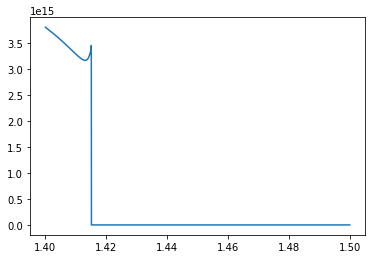

In [94]:
plt.plot(X_dat,EIloss_val_0)

In [ ]:
loss_val_0

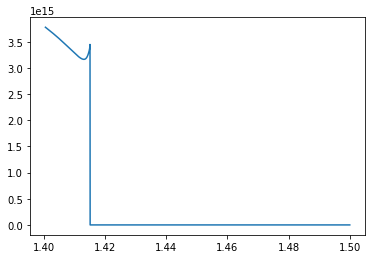

In [95]:
plt.plot(X_dat[50:],EIloss_val_0[50:])

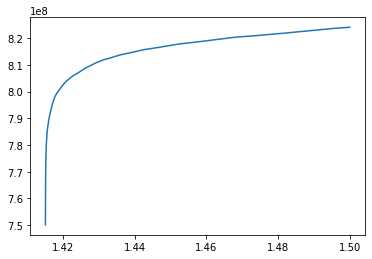

In [98]:
plt.plot(X_dat[1509:],EIloss_val_0[1509:])

In [100]:
EIloss_val_0[1505:1515]

[3445875910407816.500000000000000,
 3448111356794216.000000000000000,
 3410437911855338.500000000000000,
 3165757575295281.500000000000000,
 750063164.236590862274170,
 758861688.078688144683838,
 762227194.956817865371704,
 764429437.262867212295532,
 766481530.069815397262573,
 768133977.846403837203979]

In [97]:
EIloss_val_0.index(min(EIloss_val_0))

1509

In [102]:
X_dat[1508:1511]

array([1.41508, 1.41509, 1.4151 ], dtype=float128)

In [115]:
X_dat2=[]
X_data2=1.41508
while X_data2 <= 1.4151 :
  X_dat2.append(X_data2)
  X_data2= X_data2 + 1e-08
  print(X_data2)

X_dat2=list(map(np.longdouble, X_dat2))  

1.4150800099999998
1.4150800199999998
1.4150800299999997
1.4150800399999997
1.4150800499999996
1.4150800599999995
1.4150800699999995
1.4150800799999994
1.4150800899999993
1.4150800999999993
1.4150801099999992
1.4150801199999992
1.415080129999999
1.415080139999999
1.415080149999999
1.415080159999999
1.4150801699999989
1.4150801799999988
1.4150801899999987
1.4150801999999987
1.4150802099999986
1.4150802199999986
1.4150802299999985
1.4150802399999984
1.4150802499999984
1.4150802599999983
1.4150802699999983
1.4150802799999982
1.4150802899999981
1.415080299999998
1.415080309999998
1.415080319999998
1.4150803299999979
1.4150803399999978
1.4150803499999978
1.4150803599999977
1.4150803699999976
1.4150803799999976
1.4150803899999975
1.4150803999999975
1.4150804099999974
1.4150804199999973
1.4150804299999973
1.4150804399999972
1.4150804499999972
1.415080459999997
1.415080469999997
1.415080479999997
1.415080489999997
1.4150804999999969
1.4150805099999968
1.4150805199999967
1.4150805299999967
1.41

In [116]:
X_dat2=np.round(X_dat2,10)

In [120]:
nx=len(X_dat2)
ni=len(range(0, len(summary)-10)) ##E의 마지막 10개는 제외
I_Hat= np.zeros((nx, ni)) ## 2차원 배열 선언
E_Hat= np.zeros((nx, ni))


for j,x in enumerate(X_dat2):
  I_Hat[j]= estimated_EI(x)[0]
  E_Hat[j]= estimated_EI(x)[1]

In [121]:
EIloss_val_1=[]
for i in range(0, nx):
  EIloss_val_1.append(loss(I_Hat[i],E_Hat[i]))


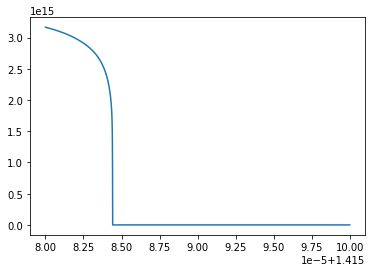

In [123]:
plt.plot(X_dat2,EIloss_val_1)

In [124]:
EIloss_val_1.index(min(EIloss_val_1))

442

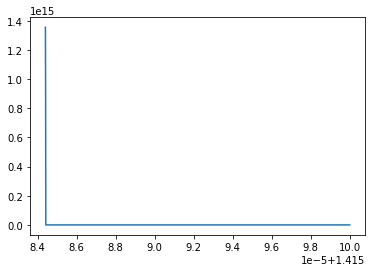

In [126]:
plt.plot(X_dat2[440:],EIloss_val_1[440:])

In [128]:
X_dat2[441:444]

array([1.41508441, 1.41508442, 1.41508443], dtype=float128)

In [129]:
EIloss_val_1[441:444]

[897431519237737.000000000000000,
 650652119.314484596252441,
 699468239.567921638488770]

In [168]:
X_dat3=[]
X_data3=1.41508441
while X_data3 <= 1.41508443 :
  X_dat3.append(X_data3)
  X_data3= X_data3 + 1e-11

X_dat3=list(map(np.longdouble, X_dat3)) 

In [169]:
X_dat3=np.round(X_dat3, 11)

In [170]:
X_dat3

array([1.41508441   , 1.41508441001, 1.41508441002, ..., 1.41508442997,
       1.41508442998, 1.41508442999], dtype=float128)

In [171]:
nH=len(X_dat3)
ni=len(range(0, len(summary)-10))
I_HHat= np.zeros((nH, ni)) ## 2차원 배열 선언
E_HHat= np.zeros((nH, ni))


for j,x in enumerate(X_dat3):
  I_HHat[j]= estimated_EI(x)[0]
  E_HHat[j]= estimated_EI(x)[1]

In [172]:
EIloss_val_2=[]
for i in range(0, nH):
  EIloss_val_2.append(loss(I_HHat[i],E_HHat[i]))

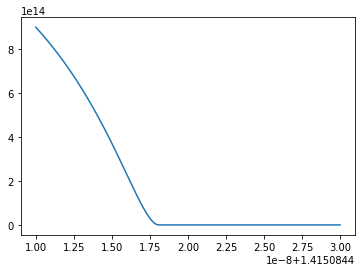

In [173]:
plt.plot(X_dat3,EIloss_val_2)

In [174]:
EIloss_val_2.index(min(EIloss_val_2))

807

In [175]:
X_dat3[807]

1.41508441807

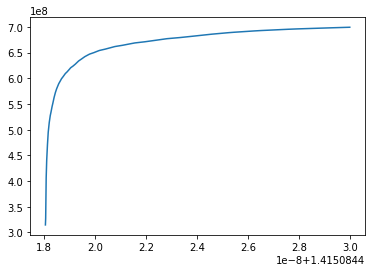

In [147]:
plt.plot(X_dat3[807:],EIloss_val_2[807:])

In [149]:
 EIloss_val_2[806:810]

[14599587019.650390625000000,
 314727125.065482735633850,
 327505476.281423091888428,
 373165722.201555371284485]

In [150]:
X_dat3[806:810]

array([1.41508441806, 1.41508441807, 1.41508441808, 1.41508441809],
      dtype=float128)

In [159]:
X_dat4=[]
X_data4=1.41508441806
while X_data4 <= 1.41508441808 :
  X_dat4.append(X_data4)
  X_data4= X_data4 + 1e-13

X_dat4=list(map(np.longdouble, X_dat4)) 

In [166]:
X_dat4 = np.round(X_dat4, 13)

In [177]:
X_dat4

array([1.41508441806  , 1.4150844180601, 1.4150844180602, 1.4150844180603,
       1.4150844180604, 1.4150844180605, 1.4150844180606, 1.4150844180607,
       1.4150844180608, 1.4150844180609, 1.415084418061 , 1.4150844180611,
       1.4150844180612, 1.4150844180613, 1.4150844180614, 1.4150844180615,
       1.4150844180616, 1.4150844180617, 1.4150844180618, 1.4150844180619,
       1.415084418062 , 1.4150844180621, 1.4150844180622, 1.4150844180623,
       1.4150844180624, 1.4150844180625, 1.4150844180626, 1.4150844180627,
       1.4150844180628, 1.4150844180629, 1.415084418063 , 1.4150844180631,
       1.4150844180632, 1.4150844180633, 1.4150844180634, 1.4150844180635,
       1.4150844180636, 1.4150844180637, 1.4150844180638, 1.4150844180639,
       1.415084418064 , 1.4150844180641, 1.4150844180642, 1.4150844180643,
       1.4150844180644, 1.4150844180645, 1.4150844180646, 1.4150844180647,
       1.4150844180648, 1.4150844180649, 1.415084418065 , 1.4150844180651,
       1.4150844180652, 1

In [180]:
nHH=len(X_dat4)
ni=len(range(0, len(summary)-10))
I_HHHat= np.zeros((nHH, ni))
E_HHHat= np.zeros((nHH, ni)) ## 2차원 배열 선언


for j,x in enumerate(X_dat4):
  I_HHHat[j]=estimated_EI(x)[0]
  E_HHHat[j]= estimated_EI(x)[1]

In [181]:
loss_val_3=[]
for i in range(0, nHH):
  loss_val_3.append(loss(I_HHHat[i],E_HHHat[i]))

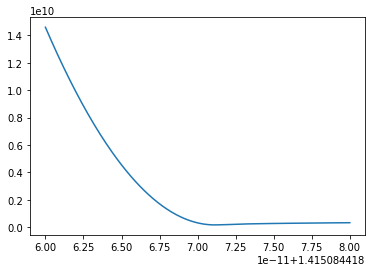

In [182]:
plt.plot(X_dat4, loss_val_3)

In [183]:
loss_val_3.index(min(loss_val_3))

111

In [184]:
X_dat4[111]

1.4150844180711

In [186]:
 loss_val_3[110:113]

[168368788.930511921644211,
 166623493.959693968296051,
 167216678.906065732240677]

In [187]:
X_dat4[110:113]

array([1.415084418071 , 1.4150844180711, 1.4150844180712], dtype=float128)

In [188]:
X_dat5=[]
X_data5=1.415084418071
while X_data5 <= 1.4150844180712:
  X_dat5.append(X_data5)
  X_data5= X_data5 + 1e-15

X_dat5=list(map(np.longdouble, X_dat5)) 

In [247]:
X_dat5=np.round(X_dat5,15)

In [224]:
nHHH=len(X_dat5)
ni=len(range(0, len(summary)-10))
I_HHHHat= np.zeros((nHHH, ni)) ## 2차원 배열 선언
E_HHHHat= np.zeros((nHHH, ni))


for j,x in enumerate(X_dat5):
  I_HHHHat[j]=estimated_EI(x)[0]
  E_HHHHat[j]=estimated_EI(x)[1]

In [225]:
loss_val_4=[]
for i in range(0, nHHH):
  loss_val_4.append(loss(I_HHHHat[i],E_HHHHat[i]))

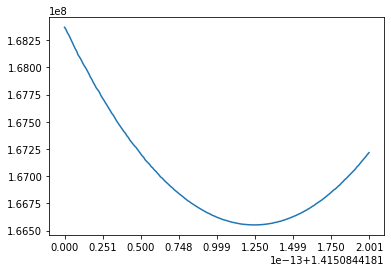

In [226]:
plt.plot(X_dat5,loss_val_4)

In [227]:
loss_val_4.index(min(loss_val_4))

112

In [234]:
 loss_val_4[110:115]

[166553517.294563800096512,
 166552881.406369984149933,
 166552679.099487930536270,
 166552781.762883692979813,
 166553303.783531069755554]

In [229]:
estimated_min=X_dat5[112]

In [232]:
X_dat5[110:112]

array([1.415084418071122, 1.415084418071123], dtype=float128)

In [246]:
X_dat5[111:115]

array([1.415084418071123, 1.415084418071124, 1.415084418071126,
       1.415084418071127], dtype=float128)

In [ ]:
# X_dat6=[]
# X_data6=1.415084418071123
# while X_data6 <= 1.415084418071126:
#   X_dat6.append(X_data6)
#   X_data6= X_data6 + 1e-18

# X_dat6=list(map(np.longdouble, X_dat6)) 

In [ ]:
# nHH=len(X_dat6)
# ni=len(range(0, len(summary)-10))
# I_HHHHat= np.zeros((nHH, ni))
# E_HHHHat= np.zeros((nHH, ni)) ## 2차원 배열 선언


# for j,x in enumerate(X_dat6):
#   I_HHHHat[j]=estimated_EI(x)[0]
#   E_HHHHat[j]= estimated_EI(x)[1]

In [235]:
#Beta에 따라 달라지는 I값 출력
#내부 함수로 짠 이유는 계속 append되기 때문에 초기화 시키기위해


def SEIR(x):  # 매개변수 x는 Beta를 나눌 수 있도록 조정하는 값 (우리가 찾은parameter)

  estimated_Sval=[]
  estimated_Eval=[]
  S_multiple=[]
  MSE=[]

  #IR이 엮여 있어서 전역변수로 저장
  E_sbetaval=[ (summary['E'][0]) ]
  I_sbetaval=[(summary['I'][0])]
  IR_betaval=[(summary['IR'][0])]
  S_sbetaval=[N - summary['clearCnt'][0] - summary['deathCnt'][0] -summary['Vt'][0]-summary['RV'][0] - IR_betaval[0] -E_sbetaval[0] -I_sbetaval[0]-summary['careCnt'][0]] #초기값 설정
  res_sum= N- summary['deathCnt']-summary['careCnt']-summary['clearCnt']-summary['Vt']-summary['RV']
  sub_N= N - summary['deathCnt']-summary['careCnt'] #N = S + E + I + R + V

  def S_Beta( df , Beta, i ):
    cal_S = 1-((I_sbetaval[i-1]/sub_N[i-1])* Beta[i-1] )
    estimated_Sval.append (cal_S)
    S_multiple.append((estimated_Sval[i-1]-1)* S_sbetaval[i-1] - (estimated_Sval[i-1]-1) * (df['daily_V'][i-1]))
    if ((estimated_Sval[i-1]* S_sbetaval[i-1]) - (estimated_Sval[i-1] * (df['daily_V'][i-1]))) > 0:
      S_sbetaval.append(((estimated_Sval[i-1]* S_sbetaval[i-1]) - (estimated_Sval[i-1] * (df['daily_V'][i-1]))))
    else:
      S_sbetaval.append(0)
    return S_sbetaval

  def E_Beta(df, Beta, S, i):
    estimated_Eval.append( ((I_sbetaval[i-1] /sub_N[i-1])* Beta[i-1] ) )
    if (estimated_Eval[i-1]* (S[i-1]- df['daily_V'][i-1]) + ( (1-epsilon)* E_sbetaval[i-1] )) > 0:
      E_sbetaval.append( (estimated_Eval[i-1]* (S[i-1]- df['daily_V'][i-1]) + ( (1-epsilon)* E_sbetaval[i-1] ) ))
    else:
      E_sbetaval.append(0)
    return E_sbetaval

  def I_Beta( df, E, i):
    if (epsilon* E[i-1] )+ ( (1-recov)* I_sbetaval[i-1] )- ((1-recov)*df['daily_X'][i] ) > 0:
      I_sbetaval.append( ((epsilon * E[i-1] ) + ( (1-recov)* I_sbetaval[i-1] )- ((1-recov)*df['daily_X'][i] )))
    else:
      I_sbetaval.append(0)
    return I_sbetaval
  
  def RI_Beta( df, I_Beta, i):
    if ( (recov * I_Beta[i-1] )+ IR_betaval[i-1]- recov *df['daily_X'][i] ) > 0:
      IR_betaval.append(( (recov * I_Beta[i-1]  )+ IR_betaval[i-1]- recov *df['daily_X'][i] ))
    else:
      IR_betaval.append(0)
    return IR_betaval



  for i in range (1,len(summary)):
    result_S=S_Beta(summary, summary['Rt']/ x,i)
    result_E=E_Beta(summary, summary['Rt']/ x, result_S,i)
    result_I=I_Beta(summary, result_E,i)
    result_RI=RI_Beta(summary,result_I,i)
    
  if (result_S[i-1]+result_E[i-1]+result_I[i-1]+result_RI[i-1] !=res_sum[i-1] ):
    result_S[i-1]+= (res_sum[i-1]-(result_S[i-1]+result_E[i-1]+result_I[i-1]+result_RI[i-1]))
    if result_S[i-1] < 0:
      result_S[i-1]=0
        
  return result_S, result_E, result_I, result_RI




In [236]:
summary['res_S']=SEIR(estimated_min)[0]
summary['res_E']=SEIR(estimated_min)[1]
summary['res_I']=SEIR(estimated_min)[2]
summary['res_RI']=SEIR(estimated_min)[3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [237]:
summary['res_I']

0      1143.645158
1       965.654548
2       986.802581
3       993.139276
4      1114.656989
          ...     
134       0.000000
135       0.000000
136       0.000000
137       0.000000
138       0.000000
Name: res_I, Length: 139, dtype: float64

E는 뒤에서 10개 값 제외 하므로 -10일치까지만 유효

In [238]:
summary.to_excel('mm.xls')

In [239]:
 summary['new']= summary['res_S']+ summary['clearCnt']+ summary['deathCnt'] +summary['Vt']+ summary['RV'] + summary['res_I']+summary['res_E'] +summary['res_RI']+ summary['careCnt'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



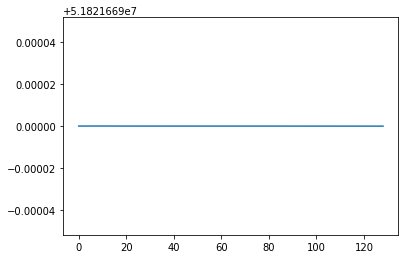

In [240]:
plt.plot(summary['new'][:-10])

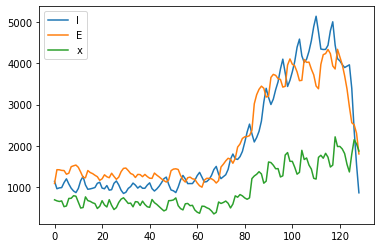

In [241]:
plt.plot(summary['res_I'][:-10], label='I')
plt.plot(summary['res_E'][:-10], label='E')
plt.plot(summary['daily_X'][:-10],label='x')
#plt.plot(summary['res_S'], label='S')
#plt.plot(summary['res_R'], label='R')
plt.legend()
plt.show()

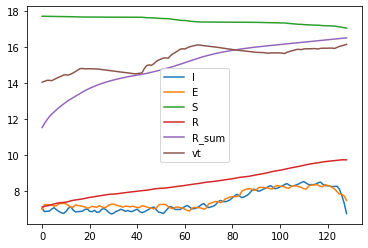

In [242]:
plt.plot(np.log(summary['res_I'][:-10]), label='I')
plt.plot(np.log(summary['res_E'][:-10]), label='E')
plt.plot(np.log(summary['res_S'][:-10]), label='S')
plt.plot(np.log(summary['res_RI'][:-10]), label='R')
plt.plot(np.log(summary['R_sum'][:-10]),label='R_sum')
plt.plot(np.log(summary['Vt'][:-10]),label='vt')
#plt.title('epsilon=0.3, alpha=8/10, S-1000, E+1000')
plt.legend()
plt.show()

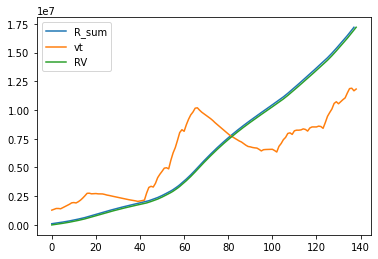

In [215]:
plt.plot(summary['R_sum'],label='R_sum')
plt.plot(summary['Vt'],label='vt')
plt.plot(summary['RV'],label='RV')
plt.legend()
plt.show()

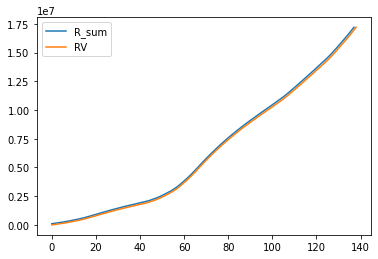

In [216]:
plt.plot(summary['R_sum'],label='R_sum')

plt.plot(summary['RV'],label='RV')
plt.legend()
plt.show()

In [208]:
summary['R_sum']=summary['res_RI']+summary['clearCnt']+summary['RV']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###############

In [ ]:
neps_0=len(np.arange(0.125, 0.5 ,0.0001))
I_eps_0= np.zeros((neps_0, ni)) ## 2차원 배열 선언


for j,eps in enumerate(np.arange(0.125, 0.5 ,0.0001)):
  I_eps_0[j]=loss_table (x=1.415, eps, rec=1/3)

In [ ]:
loss_eps_0=[]
for i in range(0, neps_0):
  loss_eps_0.append(loss(I_eps_0[j]))

In [ ]:
nrec_0=len(np.arange(0.125, 0.5 ,0.0001))
I_rec_0= np.zeros((nrec_0, ni)) ## 2차원 배열 선언


for j,eps in enumerate(np.arange(0, 0.1 ,0.0001)):
  I_rec_0[j]=loss_table (x=1.415, eps,  rec=1/3)

In [ ]:
loss_rec_0=[]
for i in range(0, nrec_0):
  loss_rec_0.append(loss(I_rec_0[j]))

In [ ]:
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(-3,3,100)
ydata = np.linspace(-3,3,100)
X,Y = np.meshgrid(xdata,ydata)
Z = 1/(1+np.exp(-X-Y))

ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, Z,cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')

plt.show()

## surface plot

#I만 했더니 결과가 안좋음. E와 I둘다

## SEIR 그래프

In [ ]:
#Beta에 따라 달라지는 I값 출력
#내부 함수로 짠 이유는 계속 append되기 때문에 초기화 시키기위해


def loss_table (x, eps, rec):  # 매개변수 x는 Beta를 나눌 수 있도록 조정하는 값 (우리가 찾아야할 parameter)
                                # eps :epsilon / rec : gamma

  estimated_Sval=[]
  estimated_Eval=[]
  S_multiple=[]
  MSE=[]

  #IR이 엮여 있어서 전역변수로 저장
  E_sbetaval=[ (summary['E'][0]) ]
  I_sbetaval=[(summary['I'][0])]
  IR_betaval=[(summary['IR'][0])]
  S_sbetaval=[N - summary['clearCnt'][0] - summary['deathCnt'][0] -summary['Vt'][0]-summary['RV'][0] - IR_betaval[0] -E_sbetaval[0] -I_sbetaval[0]-summary['careCnt'][0]] #초기값 설정
  res_sum= N- summary['deathCnt']-summary['careCnt']-summary['clearCnt']-summary['Vt']-summary['RV']
  sub_N= N - summary['deathCnt']-summary['careCnt'] #N = S + E + I + R + V

  def S_Beta( df , Beta, i ):
    cal_S = 1-((I_sbetaval[i-1]/sub_N[i-1])* Beta[i-1] )
    estimated_Sval.append (cal_S)
    S_multiple.append((estimated_Sval[i-1]-1)* S_sbetaval[i-1] - (estimated_Sval[i-1]-1) * (df['daily_V'][i-1]))
    if ((estimated_Sval[i-1]* S_sbetaval[i-1]) - (estimated_Sval[i-1] * (df['daily_V'][i-1]))) > 0:
      S_sbetaval.append(((estimated_Sval[i-1]* S_sbetaval[i-1]) - (estimated_Sval[i-1] * (df['daily_V'][i-1]))))
    else:
      S_sbetaval.append(0)
    return S_sbetaval

  def E_Beta(df, Beta, S, i):
    estimated_Eval.append( ((I_sbetaval[i-1] /sub_N[i-1])* Beta[i-1] ) )
    if (estimated_Eval[i-1]* (S[i-1]- df['daily_V'][i-1]) + ( (1-eps)* E_sbetaval[i-1] )) > 0:
      E_sbetaval.append( (estimated_Eval[i-1]* (S[i-1]- df['daily_V'][i-1]) + ( (1-eps)* E_sbetaval[i-1] ) ))
    else:
      E_sbetaval.append(0)
    return E_sbetaval

  def I_Beta( df, E, i):
    if (eps* E[i-1] )+ ( (1-rec)* I_sbetaval[i-1] )- ((1-rec)*df['daily_X'][i] ) > 0:
      I_sbetaval.append( ((eps * E[i-1] ) + ( (1-rec)* I_sbetaval[i-1] )- ((1-rec)*df['daily_X'][i] )))
    else:
      I_sbetaval.append(0)
    return I_sbetaval
  
  def RI_Beta( df, I_Beta, i):
    if ( (rec * I_Beta[i-1] )+ IR_betaval[i-1]- rec *df['daily_X'][i] ) > 0:
      IR_betaval.append(( (rec * I_Beta[i-1]  )+ IR_betaval[i-1]- rec *df['daily_X'][i] ))
    else:
      IR_betaval.append(0)
    return IR_betaval



  for i in range (1,len(summary)):
    result_S=S_Beta(summary, summary['Rt']/ x,i)
    result_E=E_Beta(summary, summary['Rt']/ x, result_S,i)
    result_I=I_Beta(summary, result_E,i)
    result_RI=RI_Beta(summary,result_I,i)
    
  if (result_S[i-1]+result_E[i-1]+result_I[i-1]+result_RI[i-1] !=res_sum[i-1] ):
    result_S[i-1]+= (res_sum[i-1]-(result_S[i-1]+result_E[i-1]+result_I[i-1]+result_RI[i-1]))
    if result_S[i-1] < 0:
      result_S[i-1]=0
        
  return result_I




## other parameters o estimate ( rho / delta)

In [ ]:
summary['daily_D']=summary['deathCnt'].diff()
summary['daily_RH']=summary['clearCnt'].diff()

In [ ]:
# Delta
# apply  H(t-1)delta(t)
#4월 15일의 daily_X=6 과 4월 14일의 careCnt를 이용하면..
delta=[0]
for i in range(1, len(summary)):
  delta.append(summary['daily_D'][i] / summary['careCnt'][i-1] )
print(delta)

In [ ]:
plt.plot(delta)
plt.title('delta')


In [ ]:
Ddelta=summary['daily_D']/summary['daily_X']
plt.plot(Ddelta)
plt.title('daily_delta(by government)')

In [ ]:
acc_delta=summary['deathCnt']/summary['decideCnt']
plt.plot(acc_delta)
plt.title('accumulated_delta(by government')

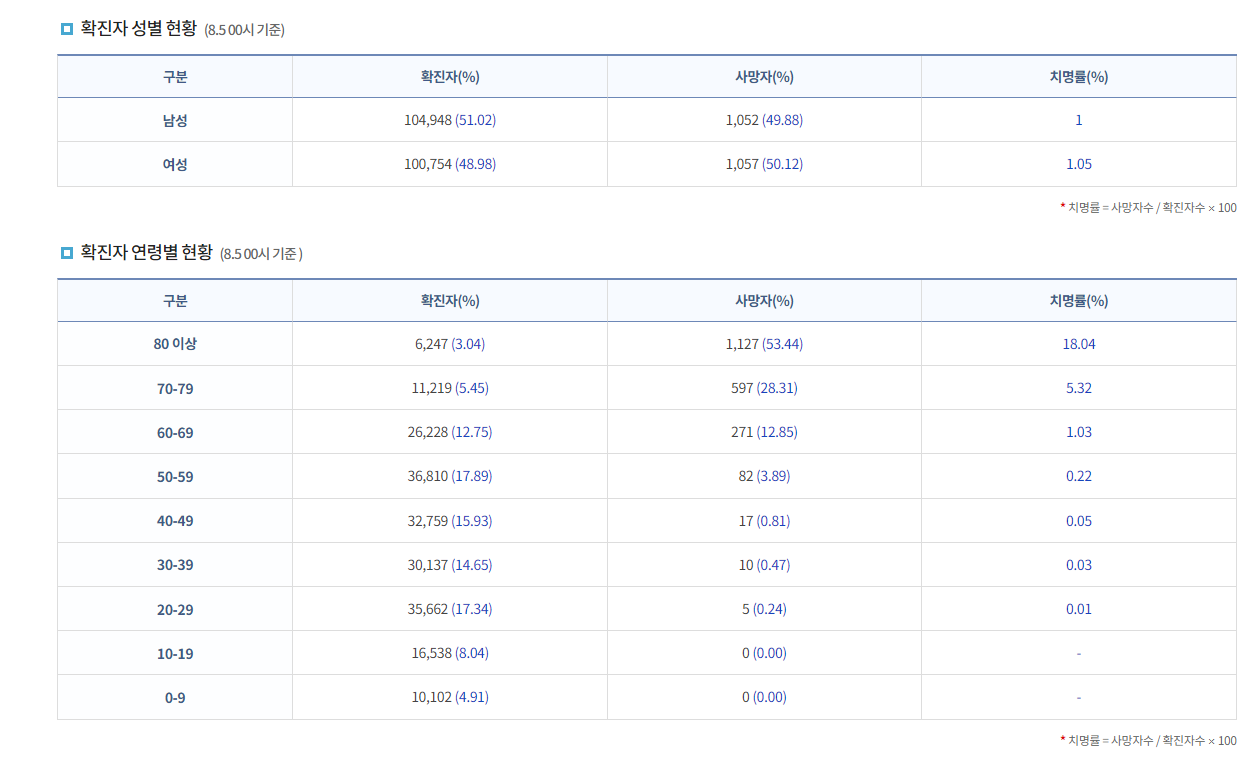

In [ ]:
#rho is R_H(t)-R_H(t-1)=H(t-1)(1-delta(t))(rho(t))
rho=[]
for i in range(1, len(summary)):
  rho.append( (summary['daily_RH'][i]) / (summary['careCnt'][i-1] * (1-delta[i]) ))

In [ ]:
print(rho)

In [ ]:
plt.plot(rho)
plt.title('rho')

In [ ]:
quarantine=[]
for i in range(0, len(rho)):
  quarantine.append((1/rho[i]))

In [ ]:
plt.plot(quarantine)
plt.title('quarantine period')

In [ ]:
max(quarantine)